Importamos las librerías necesarias.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print("Se han importado las librerias necesarias")

Se han importado las librerias necesarias


Creamos el DataFrame, añadiendo los datos de opinión y la cantidad de votantes.

In [17]:
df_peliculas = pd.DataFrame({"Opinión (Xi)":np.array([5, 4, 3, 2, 1, 0]), "Cantidad de votantes(Ni)":np.array([40, 99, 145, 133, 96, 40])})   # Cada array es una columna.
df_peliculas.head()    # El .head() para mostrar las primeras filas.

,Opinión (Xi),Cantidad de votantes(Ni)
0,5,40
1,4,99
2,3,145
3,2,133
4,1,96


Hacemos un gráfico de barras con los datos de la opinión de los usuarios. A continuación, hacemos una recta que forman los datos.

Text(0, 0.5, 'Cantidad de votantes (Ni)')

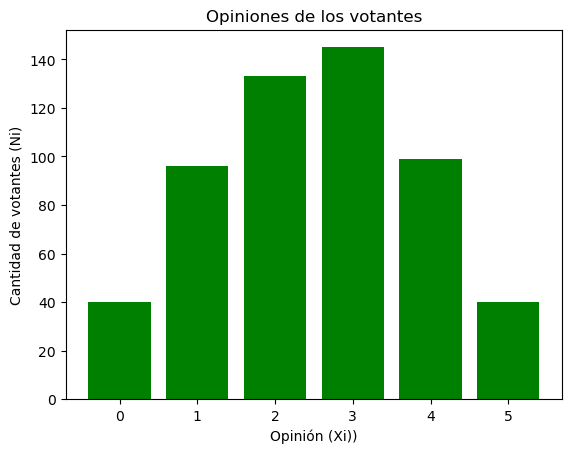

In [18]:
plt.bar(df_peliculas["Opinión (Xi)"], df_peliculas["Cantidad de votantes(Ni)"], color="green")
plt.title("Opiniones de los votantes")
plt.xlabel("Opinión (Xi))")
plt.ylabel("Cantidad de votantes (Ni)")
x_puntos = df_peliculas["Opinión (Xi)"]
y_puntos = df_peliculas["Cantidad de votantes(Ni)"]

plt.plot(x_puntos, y_puntos, color="blue")

Ahora vamos a hacer algunos cálculos que al mismo tiempo nos permitirán ver cómo utilizar la idea de frecuencia en los cálculos de media y de desviación típica.

 A fin de calcular la media de esta serie de observaciones, para cada observación hay que realizar el producto de las opiniones por la cantidad de votantes.

In [20]:
df_peliculas["Xi*Ni"] = df_peliculas["Opinión (Xi)"] * df_peliculas["Cantidad de votantes(Ni)"]
df_peliculas   # Muestra la tabla con la nueva columna.

,Opinión (Xi),Cantidad de votantes(Ni),Xi*Ni
0,5,40,200
1,4,99,396
2,3,145,435
3,2,133,266
4,1,96,96
5,0,40,0


Hacemos el sumatorio del producto entre la opinión y la cantidad de votantes. A su vez, hacemos el sumatorio de las frecuencias (Ni). A continuación, dividimos el primer sumatorio entre el segundo para obtener la media.

In [21]:
sumatorio_producto = df_peliculas["Xi*Ni"].sum()
sumatorio_frecuencia = df_peliculas["Cantidad de votantes(Ni)"].sum()
media = round(sumatorio_producto / sumatorio_frecuencia,2)

Añadimos al DataFrame la varianza.

In [22]:
df_peliculas["Ni * ((Xi - media)^2)"] = round(df_peliculas["Cantidad de votantes(Ni)"] * ((df_peliculas["Opinión (Xi)"] - media)**2),2)
df_peliculas

,Opinión (Xi),Cantidad de votantes(Ni),Xi*Ni,Ni * ((Xi - media)^2)
0,5,40,200,246.02
1,4,99,396,216.85
2,3,145,435,33.41
3,2,133,266,35.96
4,1,96,96,221.80
5,0,40,0,254.02


Calculamos la varianza y calculamos la desviación típica.

In [23]:
sumatorio_varianza = df_peliculas["Ni * ((Xi - media)^2)"].sum()
varianza = round(sumatorio_varianza / sumatorio_frecuencia,2)
desviacion_tipica = round(varianza**0.5,2)
print("La varianza es: ", varianza, "y la desviación típica es: ", desviacion_tipica)


La varianza es:  1.82 y la desviación típica es:  1.35


Examinamos el reparto de observaciones en función de las desviaciones entre la media y la desviación típica que permite definir los 68 % de los repartos.

In [29]:
limite_inferior = media - desviacion_tipica
limite_superior = media + desviacion_tipica
sumatorio_de_observaciones = df_peliculas["Cantidad de votantes(Ni)"].sum()
observaciones_en_intervalo = df_peliculas[(df_peliculas["Opinión (Xi)"] >= limite_inferior) & (df_peliculas["Opinión (Xi)"] <= limite_superior)]
sumatorio_observaciones_en_intervalo = observaciones_en_intervalo["Cantidad de votantes(Ni)"].sum()
porcentaje_observaciones_en_intervalo = round((sumatorio_observaciones_en_intervalo / sumatorio_de_observaciones) * 100,2)
print("El porcentaje de observaciones en el intervalo es: ", porcentaje_observaciones_en_intervalo, "%")
print (sumatorio_de_observaciones)
print (sumatorio_observaciones_en_intervalo)

El porcentaje de observaciones en el intervalo es:  50.27 %
553
278
